In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [3]:
# Load data
df = pd.read_csv('Electric_Production.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
value_col = 'IPG2211A2N'
# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [4]:
# Function to create sequences for supervised learning
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

sequence_length = 12  # using last 12 months to predict next
X, y = create_sequences(scaled_data, sequence_length)

# Split into training and testing
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [11]:
X[:5]

array([[[0.23201741],
        [0.20727443],
        [0.09630353],
        [0.02910391],
        [0.        ],
        [0.03745865],
        [0.09859805],
        [0.10707831],
        [0.07112325],
        [0.0135012 ],
        [0.03624525],
        [0.18085375]],

       [[0.20727443],
        [0.09630353],
        [0.02910391],
        [0.        ],
        [0.03745865],
        [0.09859805],
        [0.10707831],
        [0.07112325],
        [0.0135012 ],
        [0.03624525],
        [0.18085375],
        [0.24282188]],

       [[0.09630353],
        [0.02910391],
        [0.        ],
        [0.03745865],
        [0.09859805],
        [0.10707831],
        [0.07112325],
        [0.0135012 ],
        [0.03624525],
        [0.18085375],
        [0.24282188],
        [0.17103322]],

       [[0.02910391],
        [0.        ],
        [0.03745865],
        [0.09859805],
        [0.10707831],
        [0.07112325],
        [0.0135012 ],
        [0.03624525],
        [0.18085375],
    

In [5]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.1905 - val_loss: 0.1818
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0540 - val_loss: 0.0211
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0182 - val_loss: 0.0221
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0124 - val_loss: 0.0174
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0118 - val_loss: 0.0174
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0117 - val_loss: 0.0178
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0119 - val_loss: 0.0179
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0109 - val_loss: 0.0191
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0110 - val_loss: 0.0173
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0109 - val_loss: 0.0172
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0103 - val_loss: 0.0180
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0109 - val_

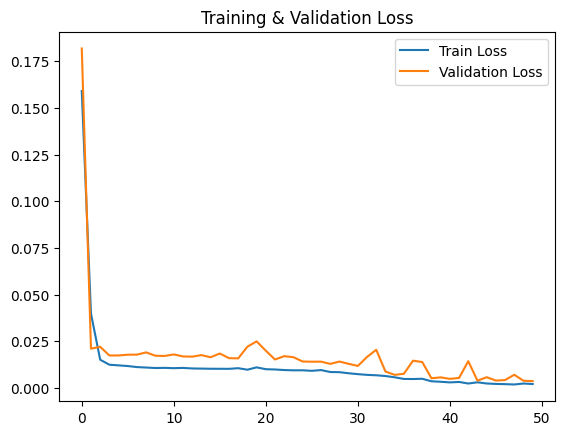

In [7]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training & Validation Loss")
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step


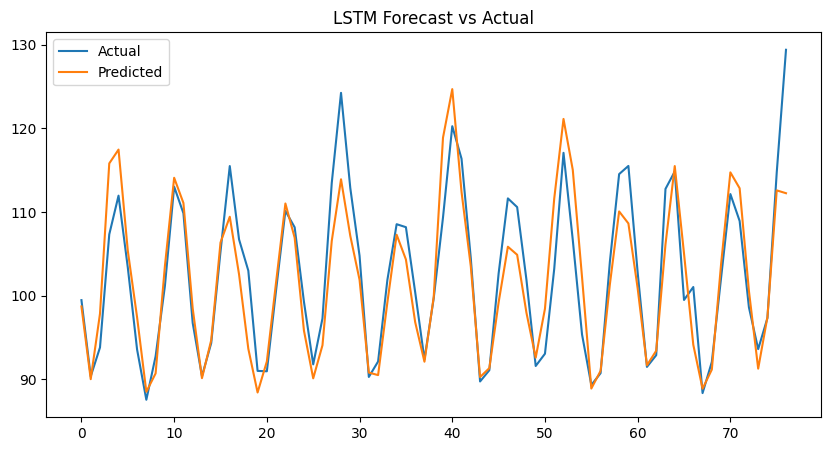

In [8]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(actual, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title("LSTM Forecast vs Actual")
plt.show()